In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import analysis_pkg
%load_ext autoreload
%autoreload 2

In [2]:
start_time = time.time()
mod_fit = analysis_pkg.fit_spec_years(2013,2018)
print(" %s min" % round(((time.time() - start_time)/60), 2))


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Paral

In [25]:
start_time = time.time()
sex_sep, sex_full, cat_full = analysis_pkg.singleyear_multibase_analysis(2018, mod_fit)
print(" %s min" % round(((time.time() - start_time)/60), 2))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
 0.25 min


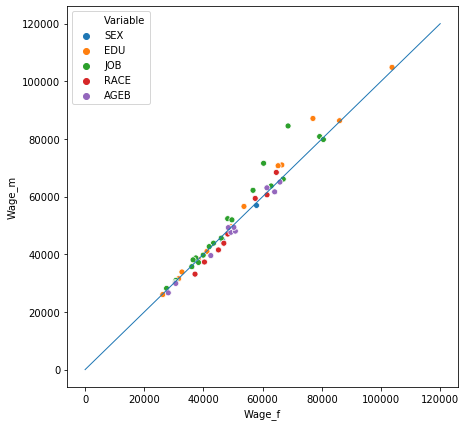

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Wage_f", y="Wage_m", hue="Variable",data=sex_sep)
plt.plot([0,120000], [0,120000], linewidth=1)

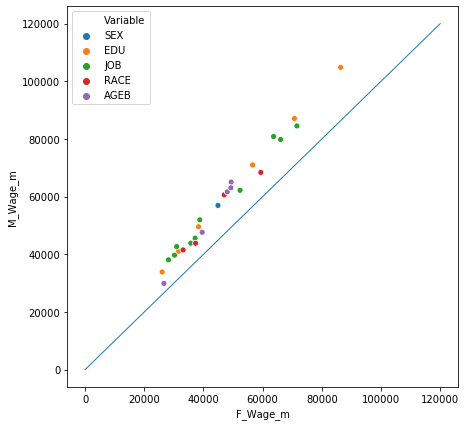

In [41]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="F_Wage_m", y="M_Wage_m", hue="Variable",data=sex_full)
plt.plot([0,120000], [0,120000], linewidth=1)

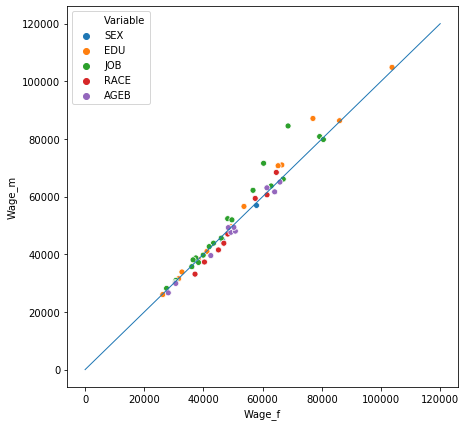

In [43]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Wage_f", y="Wage_m", hue="Variable",data=sex_sep)
plt.plot([0,120000], [0,120000], linewidth=1)

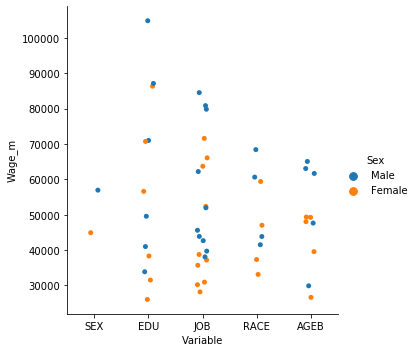

In [40]:
g = sns.catplot(x="Variable", y="Wage_m", hue="Sex",
                data=sex_sep)

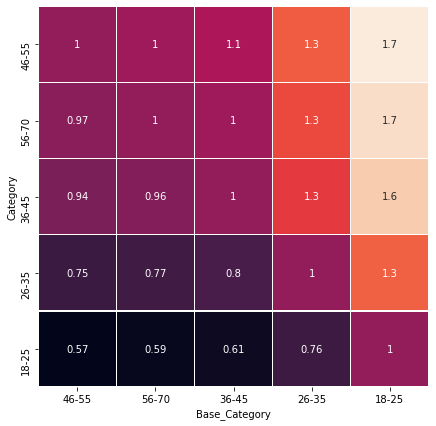

In [19]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'AGEB')

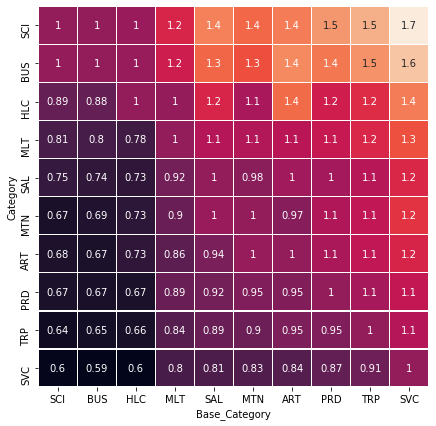

In [20]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'JOB')

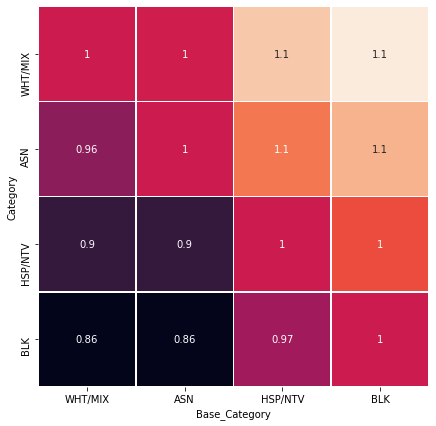

In [21]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'RACE')

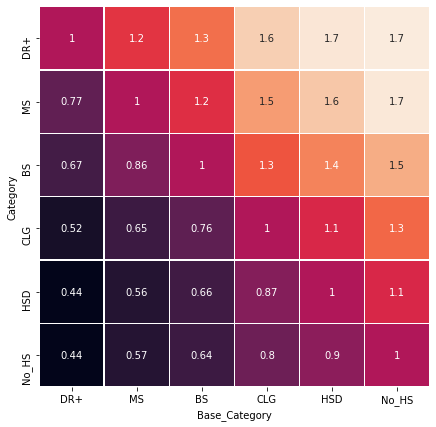

In [22]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'EDU')

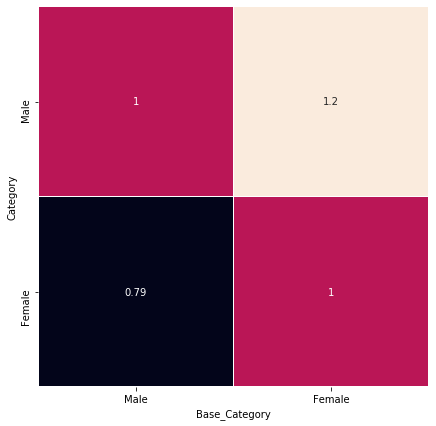

In [23]:
analysis_pkg.plot_heatmap_basecat(cat_full, 'SEX')

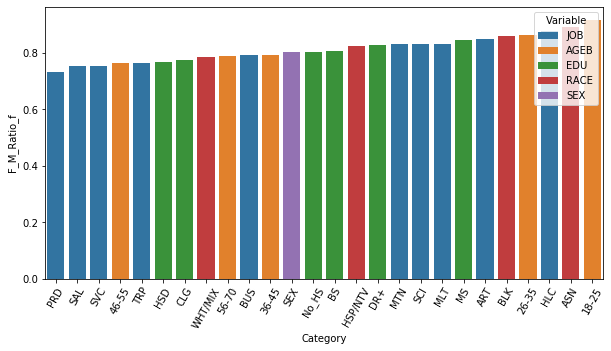

In [32]:
sex_full_sort = sex_full.sort_values(by=['F_M_Ratio_f'])
sex_full_list = sex_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="F_M_Ratio_f", x="Category", dodge = False,
                hue='Variable', data=sex_full_sort)

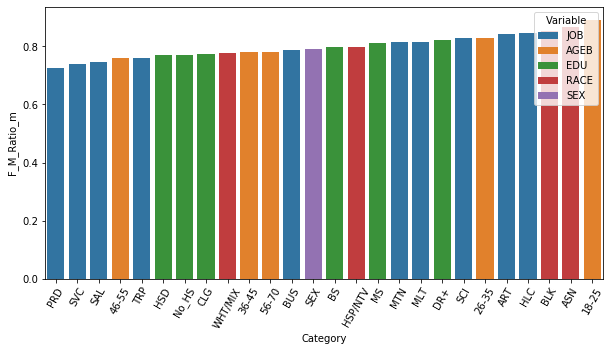

In [33]:
sex_full_sort = sex_full.sort_values(by=['F_M_Ratio_m'])
sex_full_list = sex_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="F_M_Ratio_m", x="Category", dodge = False,
                hue='Variable', data=sex_full_sort)